## Text Classification with LogisticRegression

In [234]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer

### Read dataset

In [235]:
df = pd.read_csv('../data/merged_plots.csv', index_col=0)
df.head()

,title,plot,is_indian
0,10.0 Earthquake,As a series of minor earthquakes start tearing...,0
1,12 Rounds (film),A sting operation to capture arms dealer Miles...,0
2,12 Rounds 3: Lockdown,Detective Tyler Burke and his two men infiltr...,0
3,200 mph,When the older brother (Tommy Nash) he idolize...,0
4,Ablaze (2001 film),Andrew Thomas is an agent tasked with recordin...,0


In [236]:
pd.set_option('display.max_columns', None)
df

,title,plot,is_indian
0,10.0 Earthquake,As a series of minor earthquakes start tearing...,0
1,12 Rounds (film),A sting operation to capture arms dealer Miles...,0
2,12 Rounds 3: Lockdown,Detective Tyler Burke and his two men infiltr...,0
3,200 mph,When the older brother (Tommy Nash) he idolize...,0
4,Ablaze (2001 film),Andrew Thomas is an agent tasked with recordin...,0
...,...,...,...
3995,Choked (film),Sarita Pillai and Sushant Pillai are a married...,1
3996,Chumbak,"Chumbak is a coming-of-age story of Baalu, a t...",1
3997,Chungakkarum Veshyakalum,Chungakkarum Veshyakalum is the story of a Mal...,1
3998,Chuzhi,Varghese is a planter who lives with his wife ...,1


==>Print all columns

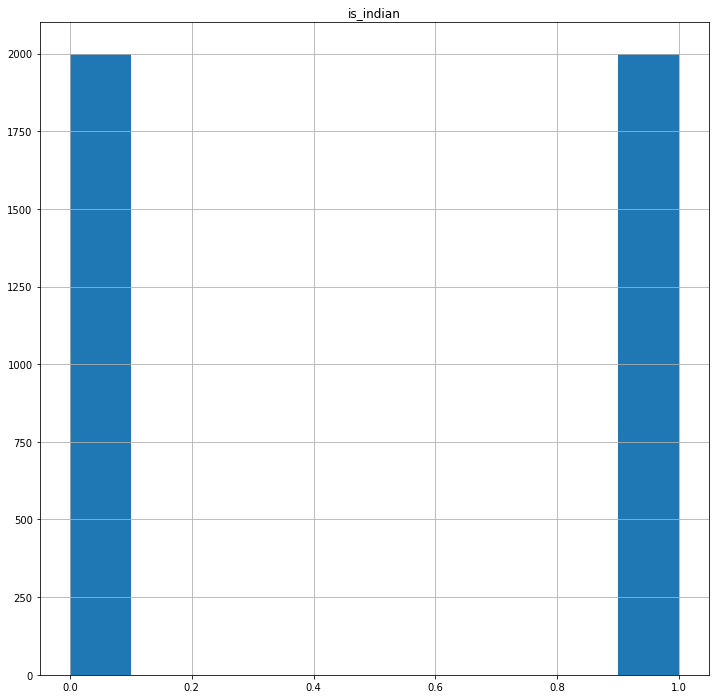

In [237]:
df.hist(figsize=(12,12));

==> The data are balanced

<AxesSubplot:>

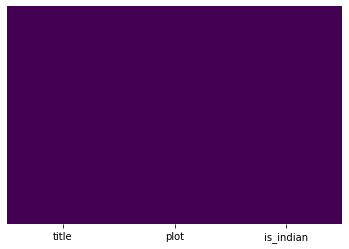

In [238]:
sns.heatmap(df.isnull(),yticklabels=False, cbar=False, cmap = 'viridis')

==> No missing data

In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      4000 non-null   object
 1   plot       4000 non-null   object
 2   is_indian  4000 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 125.0+ KB


In [240]:
print(f'Number of columns are {len(df.columns) - 1} and they are: ')
column_names = []
for column in df:
  print(column)
  column_names.append(column)

Number of columns are 2 and they are: 
title
plot
is_indian


### PreProcessing

In [241]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

porter_stemmer=PorterStemmer()
stop_words = set(stopwords.words('english'))

def clean(text, join=True):

    # lowercasing
    text = text.lower()

    # removing special characters
    text = re.sub('\\W', ' ', text)

    # splitting into tokens
    words = text.split()

    # removing stopwords
    filtered_words = []
    for word in words:
        if not word in stop_words:
            filtered_words.append(word)

    # word stemming
    stemmed_words = [porter_stemmer.stem(word) for word in filtered_words]

    if join:
        # joining and returning words
        return ' '.join(stemmed_words)

    return stemmed_words

In [242]:
plots_cleaned = [clean(plot, join=True) for plot in df['plot']]
print(len(plots_cleaned))
print(plots_cleaned[0])


4000
seri minor earthquak start tear apart lo angel scientist emili usg theoriz build super quak drop entir citi lava fill chasm engin jack whose daughter gone camp friend danger area whose compani respons quak due deep frack feel oblig help race emili increasingli damag citi hope divert epicent long beach potenti save million live citi lo angel


#### Scikit-learn’s CountVectorizer is used to convert a collection of text documents to a vector of token counts.

In [243]:
vectorizer = CountVectorizer(min_df=0)
vectorizer.fit(plots_cleaned)
vectorizer.vocabulary_

{'seri': 25642,
 'minor': 18302,
 'earthquak': 8684,
 'start': 27434,
 'tear': 28641,
 'apart': 1757,
 'lo': 16458,
 'angel': 1543,
 'scientist': 25325,
 'emili': 8997,
 'usg': 30368,
 'theoriz': 28938,
 'build': 4451,
 'super': 28033,
 'quak': 22696,
 'drop': 8432,
 'entir': 9145,
 'citi': 5759,
 'lava': 16029,
 'fill': 9849,
 'chasm': 5344,
 'engin': 9084,
 'jack': 13724,
 'whose': 31663,
 'daughter': 7104,
 'gone': 11118,
 'camp': 4745,
 'friend': 10358,
 'danger': 7009,
 'area': 1908,
 'compani': 6098,
 'respons': 23875,
 'due': 8485,
 'deep': 7269,
 'frack': 10251,
 'feel': 9720,
 'oblig': 20115,
 'help': 12260,
 'race': 22819,
 'increasingli': 13197,
 'damag': 6975,
 'hope': 12633,
 'divert': 8111,
 'epicent': 9181,
 'long': 16539,
 'beach': 3040,
 'potenti': 22012,
 'save': 25187,
 'million': 18239,
 'live': 16433,
 'sting': 27556,
 'oper': 20298,
 'captur': 4829,
 'arm': 1959,
 'dealer': 7177,
 'mile': 18211,
 'jackson': 13733,
 'goe': 11069,
 'awri': 2402,
 'fbi': 9696,
 'insi

### Data Splitting

In [244]:
Plot = df['plot'].values
y = df['is_indian'].values

Plot_train, Plot_test, y_train, y_test = train_test_split(Plot, y, test_size=0.25, random_state= 1000)

In [245]:
print(Plot[0])

As a series of minor earthquakes start tearing apart Los Angeles, scientist Emily of the USGS theorizes that it is all building to a super quake that will drop the entire city into a lava-filled chasm. Engineer Jack whose daughter has gone camping with her friends in the danger area and whose company is responsible for the quakes due to their deep fracking feels obligated to help, and races with Emily through the increasingly damaged city with the hopes of diverting the epicenter to Long Beach and potentially saving millions of lives in the city of Los Angeles.


In [246]:
vectorizer = CountVectorizer()
vectorizer.fit(Plot_train)

X_train = vectorizer.transform(Plot_train)
X_test = vectorizer.transform(Plot_test)
X_train


<3000x39324 sparse matrix of type '<class 'numpy.int64'>'
	with 543609 stored elements in Compressed Sparse Row format>

## Logistic Regression

In [247]:
score = []
reg = LogisticRegression(solver='liblinear', random_state=42)
reg.fit(X_train, y_train)

predictions = reg.predict(X_test)
sco = accuracy_score(y_test, predictions)

score.append(sco)


avgScore = sum(score) / len(score)
print(f'The average score is {avgScore}')

The average score is 0.966
